<a href="https://colab.research.google.com/github/Nameisharisai/Manufacture-defect-predictive-using-ml/blob/main/manufacture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting machine defectiveness using machine learning
This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

Problem definitio,Data,Evaluation,Features,Modelling,Experimentation

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [41]:
df = pd.read_csv("predictive_maintenance.csv")
df.shape

(10000, 10)

## EDA (Exploratory data Analysis)








In [42]:
df.head()

,UDI,Product,Type,Airtemperature,Ptemperature,Rotationalspeed,Torque,Toolwear,Target,FailureType
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.1,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [43]:
df.tail()

,UDI,Product,Type,Airtemperature,Ptemperature,Rotationalspeed,Torque,Toolwear,Target,FailureType
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UDI              10000 non-null  int64  
 1   Product          10000 non-null  object 
 2   Type             10000 non-null  object 
 3   Airtemperature   10000 non-null  float64
 4   Ptemperature     10000 non-null  float64
 5   Rotationalspeed  10000 non-null  int64  
 6   Torque           10000 non-null  float64
 7   Toolwear         10000 non-null  int64  
 8   Target           10000 non-null  int64  
 9   FailureType      10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [45]:
df.isnull().sum()

UDI                0
Product            0
Type               0
Airtemperature     0
Ptemperature       0
Rotationalspeed    0
Torque             0
Toolwear           0
Target             0
FailureType        0
dtype: int64

In [46]:
df.describe()

,UDI,Airtemperature,Ptemperature,Rotationalspeed,Torque,Toolwear,Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004920,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000268,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [47]:
df.Target.value_counts()

0    9661
1     339
Name: Target, dtype: int64

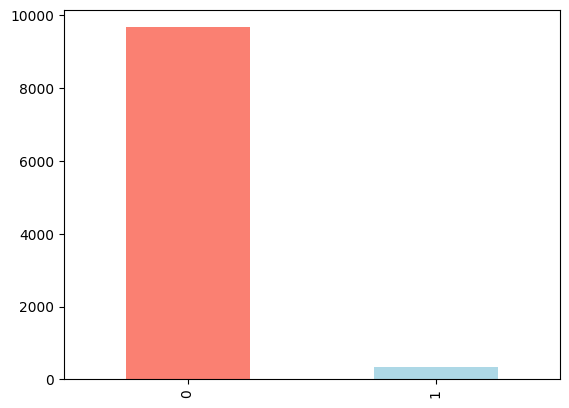

In [48]:
df.Target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UDI              10000 non-null  int64  
 1   Product          10000 non-null  object 
 2   Type             10000 non-null  object 
 3   Airtemperature   10000 non-null  float64
 4   Ptemperature     10000 non-null  float64
 5   Rotationalspeed  10000 non-null  int64  
 6   Torque           10000 non-null  float64
 7   Toolwear         10000 non-null  int64  
 8   Target           10000 non-null  int64  
 9   FailureType      10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [50]:
df.isna().sum()

UDI                0
Product            0
Type               0
Airtemperature     0
Ptemperature       0
Rotationalspeed    0
Torque             0
Toolwear           0
Target             0
FailureType        0
dtype: int64

## Defect Frequency according to Type


In [26]:
df.Type.value_counts()

L    6000
M    2997
H    1003
Name: Type, dtype: int64

In [28]:
pd.crosstab(df.Target, df.Type)

Type,H,L,M
Target,,,
0,982,5765,2914
1,21,235,83


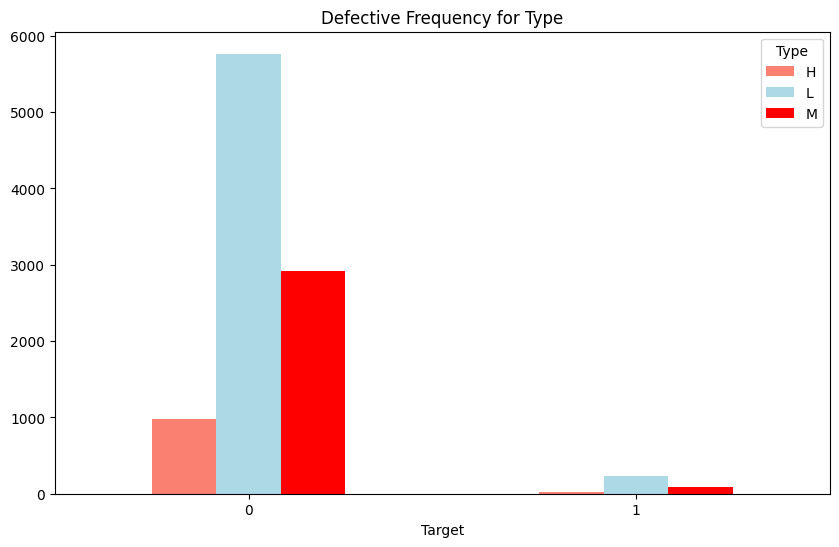

In [51]:
pd.crosstab(df.Target, df.Type).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue","red"])

plt.title("Defective Frequency for Type")

plt.xticks(rotation=0);

## Type vs Air temperature for Heart Disease

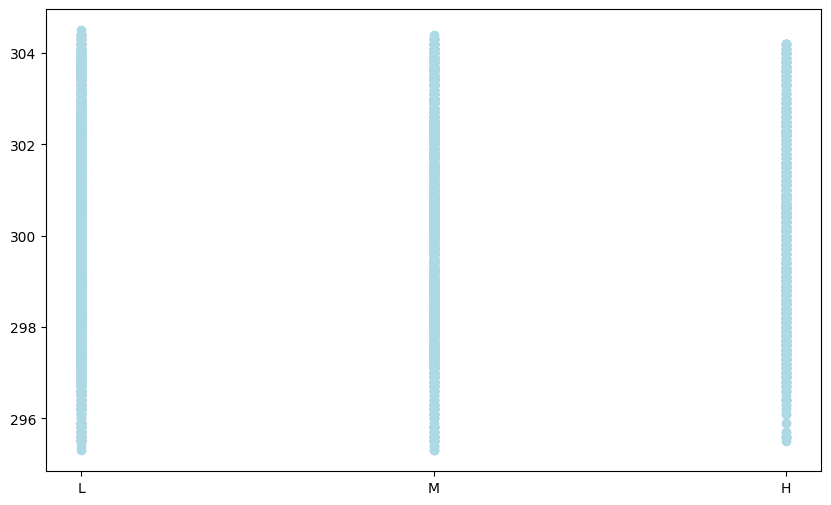

In [52]:


plt.figure(figsize=(10, 6))


plt.scatter(df.Type[df.Target==1],
            df.Airtemperature[df.Target==1],
            c="salmon")


plt.scatter(df.Type[df.Target==0],
            df.Airtemperature[df.Target==0],
            c="lightblue")



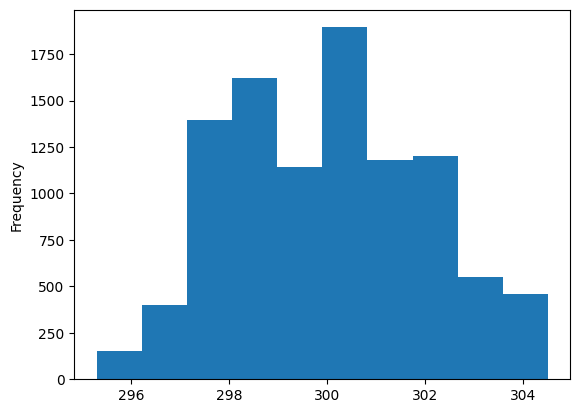

In [53]:
df.Airtemperature.plot.hist();

In [54]:
df.corr()

<ipython-input-54-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,UDI,Airtemperature,Ptemperature,Rotationalspeed,Torque,Toolwear,Target
UDI,1.000000,0.117436,0.324428,-0.006615,0.003207,-0.010702,-0.022892
Airtemperature,0.117436,1.000000,0.876108,0.022673,-0.013778,0.013861,0.082556
Ptemperature,0.324428,0.876108,1.000000,0.019277,-0.014061,0.013488,0.035946
Rotationalspeed,-0.006615,0.022673,0.019277,1.000000,-0.875027,0.000223,-0.044188
Torque,0.003207,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321
Toolwear,-0.010702,0.013861,0.013488,0.000223,-0.003093,1.000000,0.105448
Target,-0.022892,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000


<ipython-input-55-8a324467b39f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(7.5, -0.5)

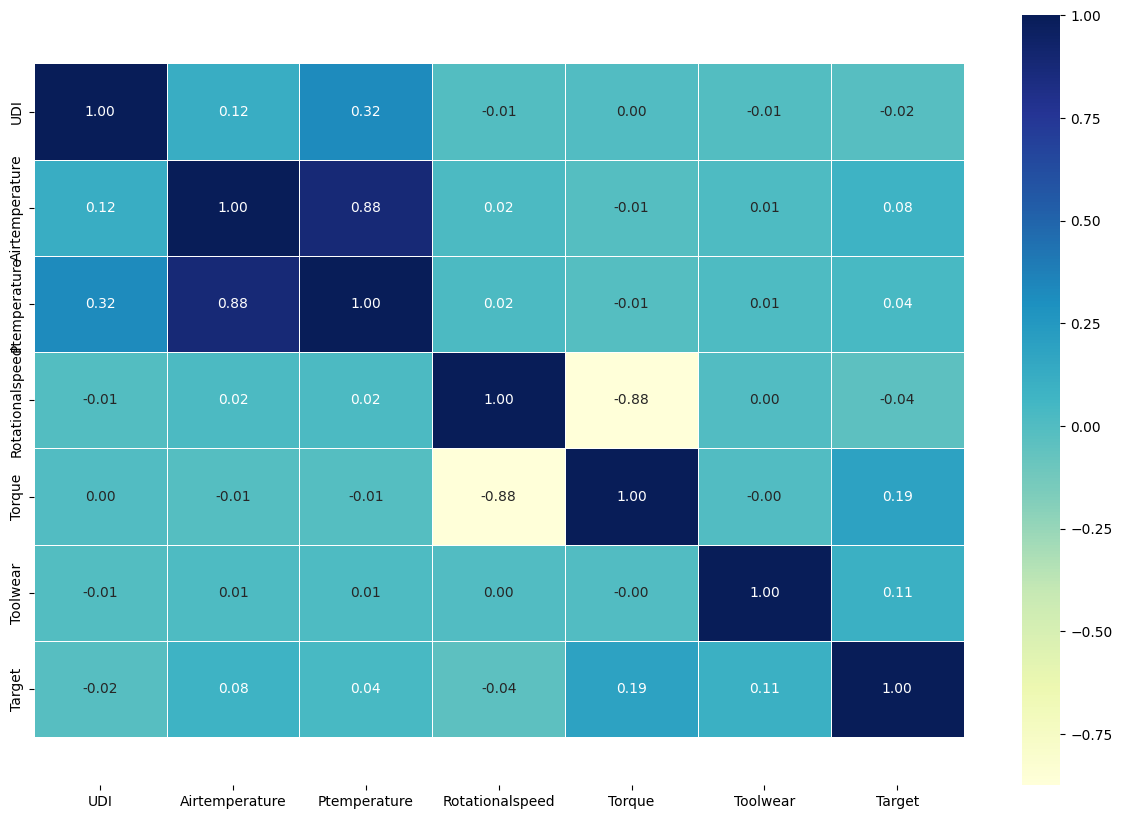

In [55]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)